## SSAC X AIFFEL AI Course Exploration 01  
## Rock Paper Scissor
---
### 인공지능과 가위바위보 하기
---
### 목차
---
#### 01. 인공지능과 가위바위보 하기
#### 02. 데이터를 준비하자!
#### 03. 딥러닝 네트워크 설계하기
#### 04. 딥러닝 네트워크 학습시키기
#### 05. 얼마나 잘 만들었는지 확인하기
#### 06. 더 좋은 네트워크 만들어 보기
#### 07. 프로젝트 : 가위바위보 분류기 만들기
#### 08. 프로젝트 제출
---

### 루브릭 (프로젝트 평가 기준)
---
#### 01. 이미지 분류기 모델이 성공적으로 만들어졌는가?
트레이닝이 정상적으로 수행되었음

#### 02. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
데이터셋의 다양성, 정규화 등의 시도가 적절하였음

#### 03. 분류모델의 Test Accuracy가 기준 이상 높게 나왔는가?
60% 이상 도달하였음

---

## 프로젝트 결과물
---

### 데이터 준비
---

+ 데이터 불러오기 및 Resize 하기

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 함, 이를 위해서는 PIL 라이브러리를 사용, 혹시 PIL 라이브러리가 없는 경우 필요한 패키지를 설치

```
pip install pillow
```

#### PIL 라이브러리 설치
---

In [22]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 이미지 Resize
---

In [51]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/01/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.*")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/train/01/scissor
가위 이미지 resize 완료!


In [52]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/01/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/train/01/rock
바위 이미지 resize 완료!


In [53]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/01/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.*")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/train/01/paper
보 이미지 resize 완료!


숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었음, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용 가능

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받음. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됨. 그리고, 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것

In [54]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/01"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


### 모델 설계
---

#### 하이퍼파라미터

train images=300

n_channel_1=16  
n_channel_2=32  
n_dense=32  
n_train_epoch=10

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model1=keras.models.Sequential()
model1.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(n_dense, activation='relu'))
model1.add(keras.layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

### 모델 학습
---

In [56]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

def load_data(img_path):
   # 가위 : 0, 바위 : 1, 보 : 2
   number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
   img_size=28
   color=3
   #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
   imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
   labels=np.zeros(number_of_data,dtype=np.int32)

   idx=0
   for file in glob.iglob(img_path+'/scissor/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=0   # 가위 : 0
       idx=idx+1

   for file in glob.iglob(img_path+'/rock/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=1   # 바위 : 1
       idx=idx+1      
  
   for file in glob.iglob(img_path+'/paper/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=2   # 보 : 2
       idx=idx+1
      
   print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
   return imgs, labels

image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/01"
print(image_dir_path_1)
(x_train_1, y_train_1)=load_data(image_dir_path_1)

print("x_train_1 shape: {}".format(x_train_1.shape))
print("y_train_1 shape: {}".format(y_train_1.shape))

x_train_norm_1 = x_train_1/255.0

x_train_reshaped_1=x_train_norm_1.reshape( -1, 28, 28, 3)

model1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# plt.imshow(x_train_1[0])
# print('라벨: ', y_train_1[0])

model1.fit(x_train_reshaped_1, y_train_1, epochs=n_train_epoch)

/home/ssac30/aiffel/rock_scissor_paper/train/01
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_1 shape: (300, 28, 28, 3)
y_train_1 shape: (300,)
Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.4500
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9503 - accuracy: 0.6600
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8007 - accuracy: 0.6633
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.7633
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.8333
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8533
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8633
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.9067
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.306

### 모델 테스트 (평가)
---

#### 하이퍼파라미터  
test images=306

In [57]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/01/scissor
가위 이미지 resize 완료!


In [58]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/01/rock
바위 이미지 resize 완료!


In [59]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/01/paper
보 이미지 resize 완료!


In [62]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

def load_data(img_path):
   # 가위 : 0, 바위 : 1, 보 : 2
   number_of_data=106+100+100   # 가위바위보 이미지 개수 총합에 주의하세요.
   img_size=28
   color=3
   #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
   imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
   labels=np.zeros(number_of_data,dtype=np.int32)

   idx=0
   for file in glob.iglob(img_path+'/scissor/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=0   # 가위 : 0
       idx=idx+1

   for file in glob.iglob(img_path+'/rock/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=1   # 바위 : 1
       idx=idx+1      
  
   for file in glob.iglob(img_path+'/paper/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=2   # 보 : 2
       idx=idx+1
      
   print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
   return imgs, labels

In [63]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

image_dir_path_2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01"
(x_test_1, y_test_1)=load_data(image_dir_path_2)

x_test_norm_1 = x_test_1 / 255.0

x_test_reshaped_1=x_test_norm_1.reshape( -1, 28, 28, 3)

학습데이터(x_train)의 이미지 개수는 306 입니다.


In [64]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model1.evaluate(x_test_reshaped_1,y_test_1, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.2160 - accuracy: 0.5523
test_loss: 1.2159556150436401 
test_accuracy: 0.5522875785827637


### 학습용 데이터 테스트 데이터 Loss & Accuracy
---

#### 학습용 데이터 : AVG 0.7733 / MIN 0.4500 / MAX 0.9067

Epoch 01/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.4500  
Epoch 02/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9503 - accuracy: 0.6600  
Epoch 03/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8007 - accuracy: 0.6633  
Epoch 04/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.7633  
Epoch 05/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.8333  
Epoch 06/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8533  
Epoch 07/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8633  
Epoch 08/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.9067  
Epoch 09/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8733  
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.8667  


#### 테스트 데이터 : 0.5523

10/10 - 0s - loss: 1.2160 - accuracy: 0.5523  
test_loss: 1.2159556150436401  
test_accuracy: 0.5522875785827637

### 모델 개선 # 01
---
+ 하이퍼 파라미터 변경
  + n_channel_1=32, 16 > 32 (2배)
  + n_channel_2=64, 32 > 64 (2배)
  + n_dense=64, 32 > 64 (2배)
  + epoch 증가 : 10 > 20 (2배)

### 모델 설계
---

#### 하이퍼파라미터

train images=300

n_channel_1=32 (16 > 32, 2배)  
n_channel_2=64 (32 > 64, 2배)  
n_dense=32 (16 > 32, 2배)  
n_train_epoch=20 (10 > 20, 2배)

In [65]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

model1=keras.models.Sequential()
model1.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(n_dense, activation='relu'))
model1.add(keras.layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

### 모델 학습
---

In [66]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

def load_data(img_path):
   # 가위 : 0, 바위 : 1, 보 : 2
   number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
   img_size=28
   color=3
   #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
   imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
   labels=np.zeros(number_of_data,dtype=np.int32)

   idx=0
   for file in glob.iglob(img_path+'/scissor/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=0   # 가위 : 0
       idx=idx+1

   for file in glob.iglob(img_path+'/rock/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=1   # 바위 : 1
       idx=idx+1      
  
   for file in glob.iglob(img_path+'/paper/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=2   # 보 : 2
       idx=idx+1
      
   print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
   return imgs, labels

image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/01"
print(image_dir_path_1)
(x_train_1, y_train_1)=load_data(image_dir_path_1)

print("x_train_1 shape: {}".format(x_train_1.shape))
print("y_train_1 shape: {}".format(y_train_1.shape))

x_train_norm_1 = x_train_1/255.0

x_train_reshaped_1=x_train_norm_1.reshape( -1, 28, 28, 3)

model1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# plt.imshow(x_train_1[0])
# print('라벨: ', y_train_1[0])

model1.fit(x_train_reshaped_1, y_train_1, epochs=n_train_epoch)

/home/ssac30/aiffel/rock_scissor_paper/train/01
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_1 shape: (300, 28, 28, 3)
y_train_1 shape: (300,)
Epoch 1/20
10/10 [==============================] - 0s 5ms/step - loss: 1.0305 - accuracy: 0.4833
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.8015 - accuracy: 0.7167
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7867
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4227 - accuracy: 0.8433
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8800
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.9033
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9300
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9567
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 0.118

### 모델 테스트 (평가)
---

#### 하이퍼파라미터  
test images=306

In [57]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/01/scissor
가위 이미지 resize 완료!


In [58]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/01/rock
바위 이미지 resize 완료!


In [59]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/01/paper
보 이미지 resize 완료!


In [67]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

def load_data(img_path):
   # 가위 : 0, 바위 : 1, 보 : 2
   number_of_data=106+100+100   # 가위바위보 이미지 개수 총합에 주의하세요.
   img_size=28
   color=3
   #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
   imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
   labels=np.zeros(number_of_data,dtype=np.int32)

   idx=0
   for file in glob.iglob(img_path+'/scissor/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=0   # 가위 : 0
       idx=idx+1

   for file in glob.iglob(img_path+'/rock/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=1   # 바위 : 1
       idx=idx+1      
  
   for file in glob.iglob(img_path+'/paper/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=2   # 보 : 2
       idx=idx+1
      
   print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
   return imgs, labels

In [68]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

image_dir_path_2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/01"
(x_test_1, y_test_1)=load_data(image_dir_path_2)

x_test_norm_1 = x_test_1 / 255.0

x_test_reshaped_1=x_test_norm_1.reshape( -1, 28, 28, 3)

학습데이터(x_train)의 이미지 개수는 306 입니다.


In [69]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model1.evaluate(x_test_reshaped_1,y_test_1, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.9613 - accuracy: 0.5163
test_loss: 1.9612510204315186 
test_accuracy: 0.516339898109436


### 학습용 데이터 테스트 데이터 Loss & Accuracy
---

#### 학습용 데이터 : AVG 0.922335 / MIN 0.4833 / MAX 1

Epoch 01/20
10/10 [==============================] - 0s 5ms/step - loss: 1.0305 - accuracy: 0.4833  
Epoch 02/20
10/10 [==============================] - 0s 5ms/step - loss: 0.8015 - accuracy: 0.7167  
Epoch 03/20
10/10 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7867  
Epoch 04/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4227 - accuracy: 0.8433  
Epoch 05/20
10/10 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8800  
Epoch 06/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.9033  
Epoch 07/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9300  
Epoch 08/20
10/10 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9567  
Epoch 09/20
10/10 [==============================] - 0s 5ms/step - loss: 0.1187 - accuracy: 0.9833  
Epoch 10/20
10/10 [==============================] - 0s 5ms/step - loss: 0.1009 - accuracy: 0.9800  
Epoch 11/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0760 - accuracy: 0.9867  
Epoch 12/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 1.0000  
Epoch 13/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9967  
Epoch 14/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 1.0000  
Epoch 15/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 1.0000  
Epoch 16/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0151 - accuracy: 1.0000  
Epoch 17/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 1.0000  
Epoch 18/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 1.0000  
Epoch 19/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 1.0000  
Epoch 20/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000  


#### 테스트 데이터 : 0.5163

10/10 - 0s - loss: 1.9613 - accuracy: 0.5163  
test_loss: 1.9612510204315186  
test_accuracy: 0.516339898109436

### 모델 개선 # 02
---
+ 학습용 데이터 증대 : 300 > 3000 (10배)
+ 하이퍼 파라미터 변경
  + n_channel_1=32, 16 > 32 (2배)
  + n_channel_2=64, 32 > 64 (2배)
  + n_dense=64, 32 > 64 (2배)
  + epoch 증가 : 10 > 20 (2배)

#### 이미지 Resize
---

In [26]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/02/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.*")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/train/02/scissor
가위 이미지 resize 완료!


In [27]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/02/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/train/02/rock
바위 이미지 resize 완료!


In [28]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/02/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.*")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/train/02/paper
보 이미지 resize 완료!


숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었음, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용 가능

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받음. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됨. 그리고, 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것

In [32]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/02"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


### 모델 설계
---

#### 하이퍼파라미터

train images=3300

n_channel_1=32  
n_channel_2=64  
n_dense=64  
n_train_epoch=20

In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

model1=keras.models.Sequential()
model1.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(n_dense, activation='relu'))
model1.add(keras.layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

### 모델 학습
---

In [35]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

def load_data(img_path):
   # 가위 : 0, 바위 : 1, 보 : 2
   number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
   img_size=28
   color=3
   #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
   imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
   labels=np.zeros(number_of_data,dtype=np.int32)

   idx=0
   for file in glob.iglob(img_path+'/scissor/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=0   # 가위 : 0
       idx=idx+1

   for file in glob.iglob(img_path+'/rock/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=1   # 바위 : 1
       idx=idx+1      
  
   for file in glob.iglob(img_path+'/paper/*.jpg'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=2   # 보 : 2
       idx=idx+1
      
   print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
   return imgs, labels

image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/02"
print(image_dir_path_1)
(x_train_1, y_train_1)=load_data(image_dir_path_1)

print("x_train_1 shape: {}".format(x_train_1.shape))
print("y_train_1 shape: {}".format(y_train_1.shape))

x_train_norm_1 = x_train_1/255.0

x_train_reshaped_1=x_train_norm_1.reshape( -1, 28, 28, 3)

model1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# plt.imshow(x_train_1[0])
# print('라벨: ', y_train_1[0])

model1.fit(x_train_reshaped_1, y_train_1, epochs=n_train_epoch)

/home/ssac30/aiffel/rock_scissor_paper/train/02
학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train_1 shape: (3300, 28, 28, 3)
y_train_1 shape: (3300,)
Epoch 1/20
104/104 [==============================] - 1s 5ms/step - loss: 1.0727 - accuracy: 0.3991
Epoch 2/20
104/104 [==============================] - 1s 5ms/step - loss: 0.8099 - accuracy: 0.6530
Epoch 3/20
104/104 [==============================] - 1s 5ms/step - loss: 0.5278 - accuracy: 0.7909
Epoch 4/20
104/104 [==============================] - 1s 5ms/step - loss: 0.3654 - accuracy: 0.8670
Epoch 5/20
104/104 [==============================] - 1s 6ms/step - loss: 0.2681 - accuracy: 0.9100
Epoch 6/20
104/104 [==============================] - 1s 6ms/step - loss: 0.2023 - accuracy: 0.9315
Epoch 7/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1553 - accuracy: 0.9503
Epoch 8/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1149 - accuracy: 0.9645
Epoch 9/20
104/104 [==============================] - 1s 6

### 모델 테스트 (평가)
---

#### 하이퍼파라미터  
test images=306

In [41]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/02/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/02/scissor
가위 이미지 resize 완료!


In [42]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/02/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/02/rock
바위 이미지 resize 완료!


In [43]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/02/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac30/aiffel/rock_scissor_paper/test/02/paper
보 이미지 resize 완료!


In [48]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

def load_data(img_path):
   # 가위 : 0, 바위 : 1, 보 : 2
   number_of_data=106+100+100   # 가위바위보 이미지 개수 총합에 주의하세요.
   img_size=28
   color=3
   #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
   imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
   labels=np.zeros(number_of_data,dtype=np.int32)

   idx=0
   for file in glob.iglob(img_path+'/scissor/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=0   # 가위 : 0
       idx=idx+1

   for file in glob.iglob(img_path+'/rock/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=1   # 바위 : 1
       idx=idx+1      
  
   for file in glob.iglob(img_path+'/paper/*.*'):
       img = np.array(Image.open(file),dtype=np.int32)
       imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
       labels[idx]=2   # 보 : 2
       idx=idx+1
      
   print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
   return imgs, labels

In [49]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

image_dir_path_2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/02"
(x_test_1, y_test_1)=load_data(image_dir_path_2)

x_test_norm_1 = x_test_1 / 255.0

x_test_reshaped_1=x_test_norm_1.reshape( -1, 28, 28, 3)

학습데이터(x_train)의 이미지 개수는 306 입니다.


In [50]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model1.evaluate(x_test_reshaped_1,y_test_1, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.3323 - accuracy: 0.6111
test_loss: 2.3322503566741943 
test_accuracy: 0.6111111044883728


### 학습용 데이터 테스트 데이터 Loss & Accuracy
---

#### 학습용 데이터 : AVG 0.9178 / MIN 0.3991 / MAX 0.9994

Epoch 01/20
104/104 [==============================] - 1s 5ms/step - loss: 1.0727 - accuracy: 0.3991  
Epoch 02/20
104/104 [==============================] - 1s 5ms/step - loss: 0.8099 - accuracy: 0.6530  
Epoch 03/20
104/104 [==============================] - 1s 5ms/step - loss: 0.5278 - accuracy: 0.7909  
Epoch 04/20
104/104 [==============================] - 1s 5ms/step - loss: 0.3654 - accuracy: 0.8670  
Epoch 05/20
104/104 [==============================] - 1s 6ms/step - loss: 0.2681 - accuracy: 0.9100  
Epoch 06/20
104/104 [==============================] - 1s 6ms/step - loss: 0.2023 - accuracy: 0.9315  
Epoch 07/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1553 - accuracy: 0.9503  
Epoch 08/20
104/104 [==============================] - 1s 5ms/step - loss: 0.1149 - accuracy: 0.9645  
Epoch 09/20
104/104 [==============================] - 1s 6ms/step - loss: 0.0985 - accuracy: 0.9721  
Epoch 10/20
104/104 [==============================] - 1s 6ms/step - loss: 0.0754 - accuracy: 0.9815  
Epoch 11/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0653 - accuracy: 0.9818  
Epoch 12/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0461 - accuracy: 0.9882  
Epoch 13/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 0.9918  
Epoch 14/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0309 - accuracy: 0.9927  
Epoch 15/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0281 - accuracy: 0.9927  
Epoch 16/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0285 - accuracy: 0.9933  
Epoch 17/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0120 - accuracy: 0.9994  
Epoch 18/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0115 - accuracy: 0.9985  
Epoch 19/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0080 - accuracy: 0.9991  
Epoch 20/20
104/104 [==============================] - 1s 5ms/step - loss: 0.0060 - accuracy: 0.9994  



#### 테스트 데이터 : 0.6111

10/10 - 0s - loss: 2.3323 - accuracy: 0.6111  
test_loss: 2.3322503566741943  
test_accuracy: 0.6111111044883728

### 결과 정리
---

### 초기 모델
---

하이퍼파라미터
train images=300

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10


#### 학습용 데이터 : AVG 0.7733 / MIN 0.4500 / MAX 0.9067
#### 테스트 데이터 : 0.5523

---


### 모델 개선 # 01 : 하이퍼파라미터를 증가시켰음에도 테스트 데이터의 정확도는 오히려 떨어짐
### (전 : 0.5523 / 후 : 0.5163)
---
하이퍼파라미터
train images=300

n_channel_1=32 (16 > 32, 2배)  
n_channel_2=64 (32 > 64, 2배)  
n_dense=32 (16 > 32, 2배)  
n_train_epoch=20 (10 > 20, 2배)



#### 학습용 데이터 : AVG 0.922335 / MIN 0.4833 / MAX 1
#### 테스트 데이터 : 0.5163

---

### 모델 개선 # 02 : 학습용 데이터수를 10배 증가시키자 테스트 데이터의 정확도가 증가함
### (전 : 0.5523 또는 0.5163 / 후 : 0.6111)
---
+ 학습용 데이터 증대 : 300 > 3000 (10배)
+ 하이퍼 파라미터 변경
  + n_channel_1=32, 16 > 32 (2배)
  + n_channel_2=64, 32 > 64 (2배)
  + n_dense=64, 32 > 64 (2배)
  + epoch 증가 : 10 > 20 (2배)

하이퍼파라미터
train images=3300

n_channel_1=32  
n_channel_2=64  
n_dense=64  
n_train_epoch=20  

#### 학습용 데이터 : AVG 0.9178 / MIN 0.3991 / MAX 0.9994
#### 테스트 데이터 : 0.6111

시험용 데이터(x_test)에 대한 인식률(test accuracy)이 train accuracy보다 많이 낮게 나오지는 않았나요?

만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

1. 테스트 데이터를 증가시키고
2. 하이퍼파라미터를 조정 (증가하는 방향으로)

## 학습 로그
---

### 딥러닝 머신러닝 절차 : 데이터 준비 > 딥러닝 네트워크 설계 > 학습 > 테스트 (평가)
01. 데이터 준비 : 데이터 준비 및 데이터 살펴보기
02. 설계 : 머신러닝 모델 학습시키기 위한 문제지, 정답지 준비하기
03. 학습 : 머신러닝 모델 학습시키기
04. 테스트 (평가) : 머신러닝 모델 평가하기
---

+ Q. 딥러닝 네트워크 설계 : 왜 네트워크 설계라고 하는 건지?

---

+ 모델 : Sequential API를 이용할 예정
+ tf.keras : TensorFlow의 표준 API
+ matplotlib : 파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공
+ TensorFlow : 구글(Google)에서 오픈소스로 제공하고 있으며, 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나
+ 대부분의 딥러닝 구현실습은 TensorFlow Version 2.0 또는 그 이상 버전에서 진행

---
Keywords : TensorFlow, Sequentail API, MNIST

### 01. 데이터 준비
---
MNIST 숫자 손글씨 Dataset 불러 들이기


```
import tensorflow as tf
from tensorflow import keras


#
mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력
print(len(y_train), len(x_test), len(y_test))

print(x_train)

2.2.0
60000
60000 10000 10000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### 준비된 데이터에서 숫자 손글씨 이미지 출력

training data : 숫자 손글씨 이미지 출력

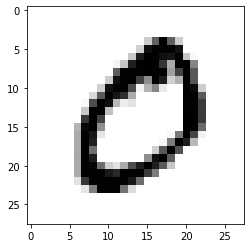

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

training 결과값 출력

In [3]:
print(y_train[1])

0


traing data 및 결과값 동시에 출력

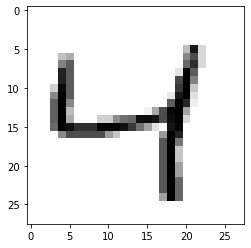

3 번째 이미지의 숫자는 바로  4 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=2     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

### 학습용 데이터와 시험용 데이터


mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것
```
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

+ 우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습
+ 학습이 끝난 후에는 이 손글씨 분류기가 얼마나 좋은 성능을 보이는지 확인해보고 싶을 텐데요, 이 때 시험용 데이터(x_test,y_test)로 테스트


+ MNIST 데이터셋은 약 500명 사용자가 작성한 숫자 이미지를 가지고 있음
+ 그 중 250여명의 데이터가 학습용 데이터로, 다른 250여명의 데이터가 시험용 데이터로 이용

---

#### 학습용 데이터

(60000, 28, 28) : 28x28 크기의 숫자 이미지가 60,000장이 있다는 뜻

In [9]:
print(x_train.shape)

(60000, 28, 28)


#### 시험용 데이터 / 검증용 데이터 (Validation Set)

머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때

(10000, 28, 28) : 28x28 크기의 숫자 이미지가 10,000장이 있다는 뜻

In [10]:
print(x_test.shape)

(10000, 28, 28)


#### 교차 검증 (Cross Validation) 기법

#### 데이터 전처리하기 : 정규화
---

+ 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋음
+ MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됨

In [11]:
# 숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가짐
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [12]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


+ Q : 인공지능 모델을 훈련시키고 사용할 때, 왜 0~1 사이의 값으로 정규화 시켜주는 것이 좋은지?

### 02. 모델 설계 : 딥러닝 네트워크 설계

tf.keras의 Sequential API 사용 예정

Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법, 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가 가능

케라스에서 모델을 만드는 방법은 Sequential API 외에도 Functional API를 이용하는 방법, 밑바닥부터 직접 코딩하는 방법 등 여러 방법이 있음

---

tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예

In [5]:
# keras의 Sequential API 모델을 사용
model=keras.models.Sequential()

# Conv2D(16, ...) 부분
# 얼마나 다양한 이미지의 특징을 살펴볼 것인가? (입력 이미지가 다양할수록 더 많은 특징을 고려해보자?)
# 입력 이미지를 다양하게 할수록 더 많은 특징을 고려해야 한다는 의미인지?
# 이미지의 특징의 수, 여기서는 각각 16개와 32개
# 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지
# 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상
# 그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있음

# input_shape=(28,28,1)
# 입력 이미지의 형태
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

# 분류기 알고리즘을 얼마나 복잡하게 할 것인가?
# 복잡한 문제일수록 이 수를 늘려주는 것을 고려해 볼 수 있음
# Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자
# 이 값이 클수록 보다 복잡한 분류기를 만들 수 있음
# 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 함
# 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것임
model.add(keras.layers.Dense(32, activation='relu'))

# 최종 분류기의 Class 수, 여기서는 0~9까지의 총 10개의 Class를 구분하므로 10
# 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정
# 숫자 인식기에서는 10, 알파벳 인식기에서는 52
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


+ Q. MaxPool2D와 MaxPooling2D의 차이점은?
+ Q. activation = 'relu', 'softmax' 이건 뭔지? 그리고 다른 activation들은 어떤 것들이 있는지?
+ Q. 알파벳 분류기의 경우, 왜 분류기에 사용되는 뉴런의 숫자로 52가 아닌 32, 64, 128 등을 고려하는 건지?

우리가 만든 딥러닝 네트워크 모델을 확인 : model.summary() 메소드를 이용

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

### 03. 모델 학습 : 딥러닝 네트워크 학습시키기

```
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
```

+ 우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가짐 : input_shape=(28,28,1)
+ 그런데 print(x_train.shape) 을 해보면,(60000, 28, 28) 로 채널수에 대한 정보가 없음. 따라서 (60000, 28, 28, 1) 로 만들어 주어야 함
+ 여기서 채널수 1은 흑백 이미지를 의미, 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이 됨

In [14]:
print(x_train.shape)

(60000, 28, 28)


In [13]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


x_train 학습 데이터로 딥러닝 네트워크를 학습, 여기서 epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻, 물론 model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용

각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인 가능, 인식 정확도가 0.9413에서 0.9957까지 매우 높게 올라감, 9 epoch정도부터는 인식률의 상승이 미미, 10 epoch정도 학습을 시키면 충분할 것

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1883 - accuracy: 0.9421
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0645 - accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0474 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0249 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0175 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

+ Q. 같은 데이터셋을 가지고 동일하게 실행했는데도 Epoch별로 Accuracy가 달라지는 이유는 뭔지?

### 테스트 (평가)

#### 테스트 데이터로 성능 확인하기
---

인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것, 연습문제를 잘푸는 인공지능을 만든 셈, 우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있을지 시험용 데이터(x_test)를 가지고 확인

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0330 - accuracy: 0.9893
test_loss: 0.03300492465496063 
test_accuracy: 0.989300012588501


학습용 데이터 Accuracy : 0.9963  
테스트 데이터 Accuracy : 0.9893

99.57점을 받을 줄 알았는데, 98.85로 시험점수가 소폭 하락, 이유는 위 MNIST 데이터셋 참고문헌을 보시면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있음, 즉, 한 번도 본적이 없는 필체의 손글씨가 섞여 있을 가능성이 높으며, 어찌보면 인식률이 떨어지는 것은 어느 정도 예상 가능한 일

### 더 좋은 네트워크 만들어보기

인식률 99점대를 목표로

딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있는데, Step 3에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것

+ Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 봄
```
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
```
+ Dense 레이어에서 뉴런수를 바꾸어 봄
```
model.add(keras.layers.Dense(32, activation='relu'))
```
+ 학습 반복 횟수인 epoch 값을 변경


In [17]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

train_epoch : 10

313/313 - 0s - loss: 0.0317 - accuracy: 0.9900  
test_loss: 0.03169659525156021  
test_accuracy: 0.9900000095367432

### 회고
---
+ 프로젝트에서 어려웠던 점
+ 프로젝트를 진행하면서 알아낸 점, 아직 모호한 점
+ 루브릭 평가 지표를 맞추기 위해 시도한 것들
+ 만약에 루브릭 평가 관련 지표를 달성하지 못했을 때, 이유에 관한 추정
+ 자기 다짐
---

#### 프로젝트에서 어려웠던 점
---

+ 처음 딥러닝 모델을 적용시키면서, tf.keras API가 익숙하지 않았던 점
+ Sequential 모델이 정확히 모르고 진행했던 점

#### 프로젝트를 진행하면서 알아낸 점, 아직 모호한 점
---

+ Q. 딥러닝 네트워크 설계 : 왜 네트워크 설계라고 하는 건지?
+ Q : 인공지능 모델을 훈련시키고 사용할 때, 왜 0~1 사이의 값으로 정규화 시켜주는 것이 좋은지?
+ Q. MaxPool2D와 MaxPooling2D의 차이점은?
+ Q. activation = 'relu', 'softmax' 이건 뭔지? 그리고 다른 activation들은 어떤 것들이 있는지?
+ Q. 알파벳 분류기의 경우, 왜 분류기에 사용되는 뉴런의 숫자로 52가 아닌 32, 64, 128 등을 고려하는 건지?
+ Q. 같은 데이터셋을 가지고 동일하게 실행했는데도 Epoch별로 Accuracy가 달라지는 이유는 뭔지?

#### 루브릭 평가 지표를 맞추기 위해 시도한 것들
---

+ 하이퍼파라미터 변경 (2배수 증가)
```
#네트워크 모델 코드 : 하이퍼파라미터들 변경 (주로 초기 세팅된 값들보다 높게 설정, 2배 높게 설정하여 진행)
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20
```
+ 학습용 데이터 증가시켜 모델 학습 (300개 > 3000개, 10배 증가)

#### 만약에 루브릭 평가 관련 지표를 달성하지 못했을 때, 이유에 관한 추정
---

#### 자기 다짐
---

+ 아직 딥러닝 관련해서 이해 못 한 부분들이 많긴 하지만, 계속 하다보면 익숙해지고 이해할 수 있을 거라고 생각하면서, 조바심 내기 보다는 여유를 가지고 고고고